# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import importlib
import csv
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # str.title(city)

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# # Print the city count to confirm sufficient count
len(cities)

615

In [3]:
cities_df = pd.DataFrame(cities,columns=["City"])
print(cities_df)

                City
0             atuona
1    plettenberg bay
2          bonavista
3          namatanai
4        broken hill
..               ...
610           bentiu
611          chanika
612    kawana waters
613       chuguyevka
614            coari

[615 rows x 1 columns]


In [5]:
cities_df["ID"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
# Parameter for OpenWeather API
params = {"key": weather_api_key}

In [7]:
# Perform a weather check on each city using a series of successive API calls.

city = cities_df["City"]
citydata_df=pd.DataFrame(columns=["ID","Lat","Long","Max Temp","Humidity","Cloudiness","Wind","Country","Date"],index=city)
weather_response_list = []

for row in cities_df["City"]:

    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url).json()
    if weather_response['cod'] != 200:
        continue

    lat = weather_response['coord']['lat']
    lng = weather_response['coord']['lon']
    max_temp = weather_response['main']['temp_max']
    humidity = weather_response['main']['humidity']
    cloudiness = weather_response['clouds']['all']
    wind_speed = weather_response['wind']['speed']
    country = weather_response['sys']['country']
    city_id = weather_response['id']
    date_info =time.ctime(weather_response['dt'])

    citydata_df.loc[city]=[city_id,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date_info]

citydata_df.dropna(inplace=True)

print(citydata_df)


                      ID      Lat     Long Max Temp Humidity Cloudiness  \
City                                                                      
atuona           4020109     -9.8 -139.033    79.29       77         22   
plettenberg bay   964712 -34.0527  23.3716    55.27       83        100   
bonavista        5905393  48.6499 -53.1147     64.4       99         99   
namatanai        2090021  -3.6667  152.433    84.25       70        100   
broken hill      2173911   -31.95  141.433    55.11       58          2   
...                  ...      ...      ...      ...      ...        ...   
pemangkat        1631637   1.1667  108.967    78.26       85         98   
bentiu            377472   9.2333  29.8333    72.09       81         38   
chanika           160592  -5.4167  38.0167    59.13       98         67   
chuguyevka       2025286  44.1653  133.863    79.27       42         11   
coari            3664539   -4.085 -63.1414    74.07       86         32   

                  Wind C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
citydata_df.to_csv("output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = citydata_df
print(clean_city_data)

                      ID      Lat     Long Max Temp Humidity Cloudiness  \
City                                                                      
atuona           4020109     -9.8 -139.033    79.29       77         22   
plettenberg bay   964712 -34.0527  23.3716    55.27       83        100   
bonavista        5905393  48.6499 -53.1147     64.4       99         99   
namatanai        2090021  -3.6667  152.433    84.25       70        100   
broken hill      2173911   -31.95  141.433    55.11       58          2   
...                  ...      ...      ...      ...      ...        ...   
pemangkat        1631637   1.1667  108.967    78.26       85         98   
bentiu            377472   9.2333  29.8333    72.09       81         38   
chanika           160592  -5.4167  38.0167    59.13       98         67   
chuguyevka       2025286  44.1653  133.863    79.27       42         11   
coari            3664539   -4.085 -63.1414    74.07       86         32   

                  Wind C

In [11]:
northern=clean_city_data.loc[clean_city_data["Lat"] >=0,]
n_hemi_data = pd.DataFrame(northern)

In [12]:
southern = clean_city_data.loc[clean_city_data["Lat"] < 0,]
s_hemi_data = pd.DataFrame(southern)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

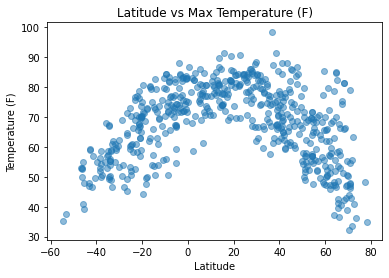

In [13]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Max Temperature (F)")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Latitude vs. Humidity Plot

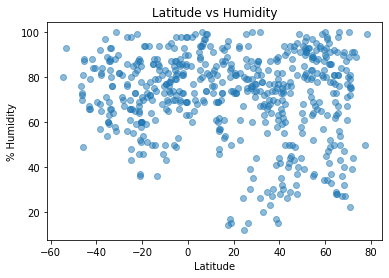

In [14]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Latitude vs Humidity")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Latitude vs. Cloudiness Plot

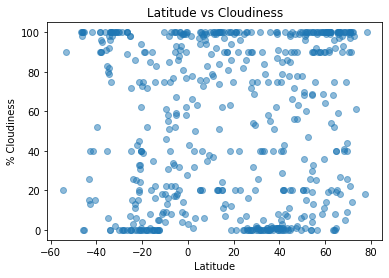

In [15]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Latitude vs. Wind Speed Plot

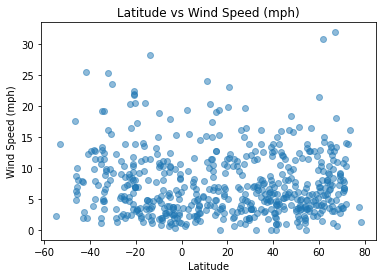

In [16]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (mph)")

plt.scatter(x_values, y_values, alpha=0.5)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

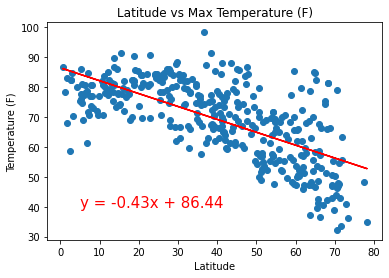

In [17]:
x_values = n_hemi_data["Lat"]
y_values = n_hemi_data["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Max Temperature (F)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,40),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

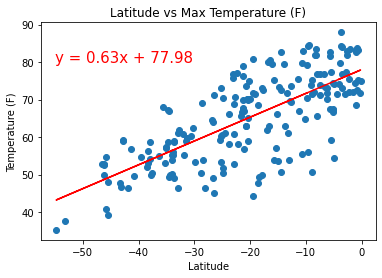

In [25]:
x_values = s_hemi_data["Lat"]
y_values = s_hemi_data["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Max Temperature (F)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

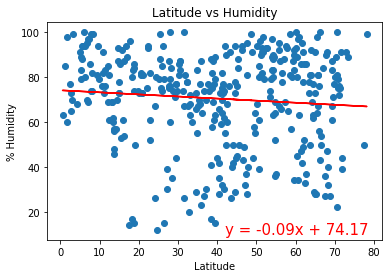

In [26]:
x_values = n_hemi_data["Lat"]
y_values = n_hemi_data["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Latitude vs Humidity")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(42,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

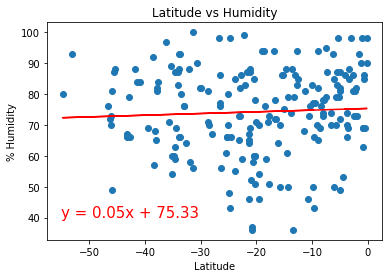

In [27]:
x_values = s_hemi_data["Lat"]
y_values = s_hemi_data["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Latitude vs Humidity")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

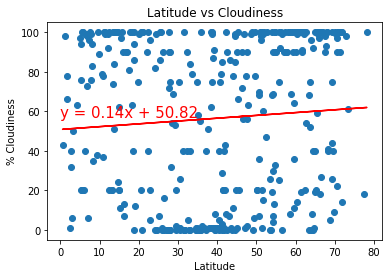

In [29]:
x_values = n_hemi_data["Lat"]
y_values = n_hemi_data["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Latitude vs Cloudiness")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,57),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

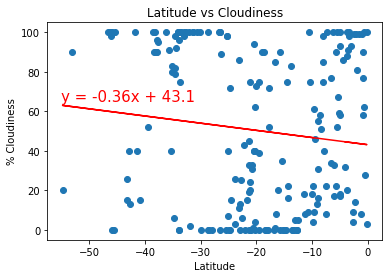

In [31]:
x_values = s_hemi_data["Lat"]
y_values = s_hemi_data["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")
plt.title("Latitude vs Cloudiness")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

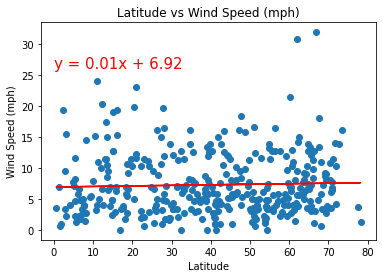

In [32]:
x_values = n_hemi_data["Lat"]
y_values = n_hemi_data["Wind"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (mph)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,26),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

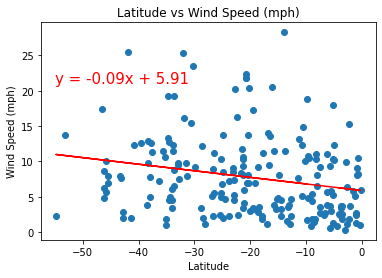

In [35]:
x_values = s_hemi_data["Lat"]
y_values = s_hemi_data["Wind"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed (mph)")
slope, intercept, r_value, p_value, std_err = stats.linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,21),fontsize=15,color="red")
plt.show()